<h1 align="center">
PROYECTO:    
    
<h6 align="center"> ANÁLISIS DE LAS CAUSALES DE INCENDIOS FORESTALES EN REPÚBLICA DOMINICANA EN LOS ÚLTIMOS 5 AÑOS. </h6>

</h1>

El proyecto de análisis de las causas de los incendios forestales en la República Dominicana genera varios valores sociales importantes. En primer lugar, desde una perspectiva medioambiental, busca contribuir a la preservación y protección de los recursos naturales del país, especialmente sus bosques y áreas forestales.

Reducir la incidencia de incendios forestales podría ayudar a conservar la biodiversidad, proteger los hábitats de la vida silvestre y mitigar el cambio climático al preservar los sumideros de carbono. Además, desde un punto de vista social, el proyecto busca proteger las comunidades cercanas a estas áreas, así como la infraestructura y los recursos económicos que dependen de los ecosistemas forestales.


### Indice:
- Fuentes de datos.
- Preguntas de análisis.
- Desarrollo.
- Conclusiones.
- Participantes.

#### Fuentes de datos:

- ###### Kaggle: https://www.kaggle.com/datasets/mbritofer/datosabiertosrd

- ###### Ministerio de Medios Ambiente: https://ambiente.gob.do/informacion-ambiental/estadisticas-ambientales/#548-720-2023-bosque

In [1]:
import pandas as pd
# You will need to install openpyxl in order to read_excels files.
incendios_data = pd.read_excel("./data/Incendios-Forestales-2021.xlsx", parse_dates=["Fecha origen", "Fecha Extincion"])

### Overviewing the data:

In [6]:
incendios_data.rename({"Mes de origen ": "Mes de origen"}, axis=1, inplace=True)
print(incendios_data.columns)

Index(['no.', 'Municipio', 'Provincia', 'Mes de origen', 'Dia de origen',
       'Mes de extincion', 'Dia extincion', 'Causas',
       'Area Afectada en Tareas', 'Metros Cuadrados', 'Mes de origen .1',
       'Fecha origen', 'Fecha Extincion', 'Fecha Mes'],
      dtype='object')


In [22]:
incendios_data.head(5)

,no.,Municipio,Provincia,Mes de origen,Dia de origen,Mes de extincion,Dia extincion,Causas,Area Afectada en Tareas,Metros Cuadrados,Mes de origen .1,Fecha origen,Fecha Extincion,Fecha Mes
0,1,Pedernales,Pedernales,Enero,5,Enero,7,Desconocida,665,418152.0,1,2021-01-05,2021-01-07,Jan-2021
1,2,Pedro Santana,Elías Piña,Enero,13,Enero,13,Conuquismo,95,59736.0,1,2021-01-13,2021-01-13,Jan-2021
2,3,Constanza,La Vega,Enero,3,Enero,3,Desconocida,1,628.8,1,2021-01-03,2021-01-03,Jan-2021
3,4,SAJOMA,Santiago,Enero,16,Enero,16,Desconocida,45,28296.0,1,2021-01-16,2021-01-16,Jan-2021
4,5,La Vega,La Vega,Enero,15,Enero,15,Intencional,8,5030.4,1,2021-01-15,2021-01-15,Jan-2021


## Preguntas de análisis:


### ¿Existe alguna relación entre las causas de los incendios y la duración o el tamaño del área afectada?

Se pueden realizar análisis de correlación para determinar si ciertas causas están asociadas con incendios más grandes o de mayor duración.

##### Tiempo promedio tomado para erradiar los incendios, según la causa y la provincia.


In [23]:
# Tiempo promedio tomado para erradiar los incendios, según la causa y la provincia.
data = incendios_data.copy()
data["Duracion Promedio Ext."] =  data["Fecha Extincion"] - data["Fecha origen"]
data = data.groupby(["Causas","Provincia"])["Duracion Promedio Ext."].mean()
data.sort_values()

Causas              Provincia    
Colmeneros          Elías Piña               -26 days +00:00:00
Conuquismo          Pedernales               -15 days +08:00:00
Ganaderia           Mons. Nouel               -4 days +00:00:00
Intencional         Elías Piña                -2 days +06:00:00
Desconocida         Elías Piña      -2 days +09:52:56.470588236
Caminantes          Azua                        0 days 00:00:00
Quema de Basura     Dajabon                     0 days 00:00:00
Desconocida         La Vega                     0 days 00:00:00
                    Mons. Nouel                 0 days 00:00:00
Ganaderia           Dajabon                     0 days 00:00:00
Desconocida         Azua                        0 days 00:00:00
Intencional         La Vega                     0 days 00:00:00
                    Santiago                    0 days 00:00:00
No Intencional      Dajabon                     0 days 00:00:00
                    Elías Piña                  0 days 00:00:00
Descon

##### Metros cuadrados totales afectados por tipo de causa.


In [24]:
# Metros cuadrados total afectados por tipo de causa.
incendios_data.groupby(["Causas"])['Metros Cuadrados'].sum()

Causas
Caminantes              496123.2
Carboneros              468456.0
Colmeneros              562776.0
Conuquismo            21695486.4
Descarga Electrica    17426563.2
Desconocida            2250475.2
Ganaderia              2154268.8
Huelguistas              78600.0
Intencional            2435971.2
Invasores                37728.0
No Intencional           99979.2
Quema de Basura          80486.4
Name: Metros Cuadrados, dtype: float64

##### Gráficas de provincias que sean visto afectas, cantidad de métros cuadrados afectados.


<Axes: ylabel='Provincia'>

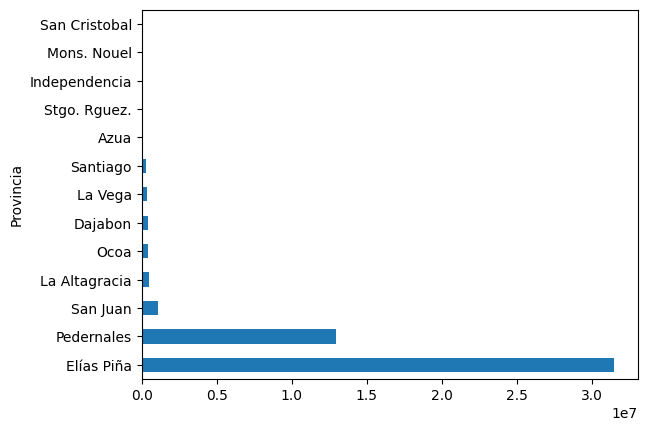

In [28]:
prov_metersquare = incendios_data.groupby("Provincia")['Metros Cuadrados'].sum().sort_values(ascending=False)
prov_metersquare.plot.barh(x="Provincias")

##### ¿Cuál es la tendencia de los incendios forestales a lo largo del tiempo?

Al analizar la columna de fecha de origen, se pueden identificar tendencias a lo largo de los años, como si la frecuencia o la magnitud de los incendios ha aumentado o disminuido con el tiempo.

### ¿Cuál es la tendencia de los incendios forestales a lo largo del tiempo?

Al analizar la columna de fecha de origen, se pueden identificar tendencias a lo largo de los años, como si la frecuencia o la magnitud de los incendios ha aumentado o disminuido con el tiempo.

In [8]:
forest_fire_trend = incendios_data.groupby("Mes de origen")["Mes de origen"].size()
forest_fire_trend.sort_values(ascending=False)

Mes de origen
Marzo         51
Febrero       37
Abril         36
Agosto        30
Mayo          27
Enero         20
Noviembre     13
Septiembre    11
Julio         10
Diciembre      8
Junio          5
Octubre        2
Name: Mes de origen, dtype: int64

<Axes: ylabel='Mes de origen'>

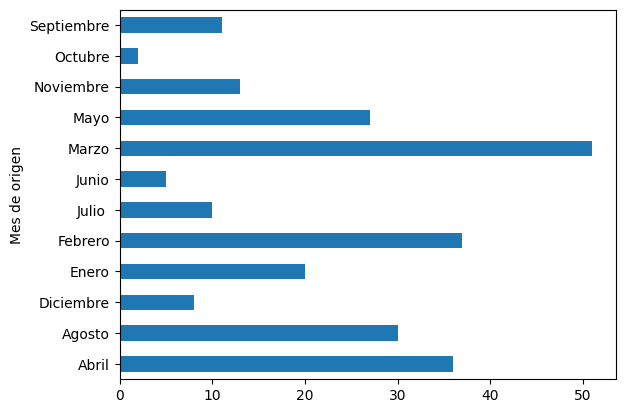

In [9]:
fig = forest_fire_trend.plot.barh()